In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from pandas.plotting import scatter_matrix

# 1)

Cargamos y leemos el dataset

In [ ]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

# 2)

Construimos el dataframe

In [ ]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df['species'] = [iris['target_names'][i] for i in df['target']]

# 3)

Renombramos las columnas con otro formato

In [ ]:
columns_name = ["".join([c.capitalize() for c in cols.split()]) for cols in df.columns]
columns_name = [col.replace("(", "_") for col in columns_name]
columns_name = [col.replace(")", "") for col in columns_name]
df.columns = columns_name

# 4)

Analizamos los datos presentes en el dataframe para poder realizar una limpieza en caso de ser necesario

In [ ]:
print("Column names:\n", df.columns.tolist())
print("\nNumber of rows, columns:", df.shape)
print("\nNull counts per column:\n", df.isnull().sum())
print("\nDescription (numeric):\n", df.describe())

Column names:
 ['SepalLength_cm', 'SepalWidth_cm', 'PetalLength_cm', 'PetalWidth_cm', 'Target', 'Species']

Number of rows, columns: (150, 6)

Null counts per column:
 SepalLength_cm    0
SepalWidth_cm     0
PetalLength_cm    0
PetalWidth_cm     0
Target            0
Species           0
dtype: int64

Description (numeric):
        SepalLength_cm  SepalWidth_cm  PetalLength_cm  PetalWidth_cm  \
count      150.000000     150.000000      150.000000     150.000000   
mean         5.843333       3.057333        3.758000       1.199333   
std          0.828066       0.435866        1.765298       0.762238   
min          4.300000       2.000000        1.000000       0.100000   
25%          5.100000       2.800000        1.600000       0.300000   
50%          5.800000       3.000000        4.350000       1.300000   
75%          6.400000       3.300000        5.100000       1.800000   
max          7.900000       4.400000        6.900000       2.500000   

           Target  
count  150.000

# 5)

Observamos algunas características estadisticas del dataframe

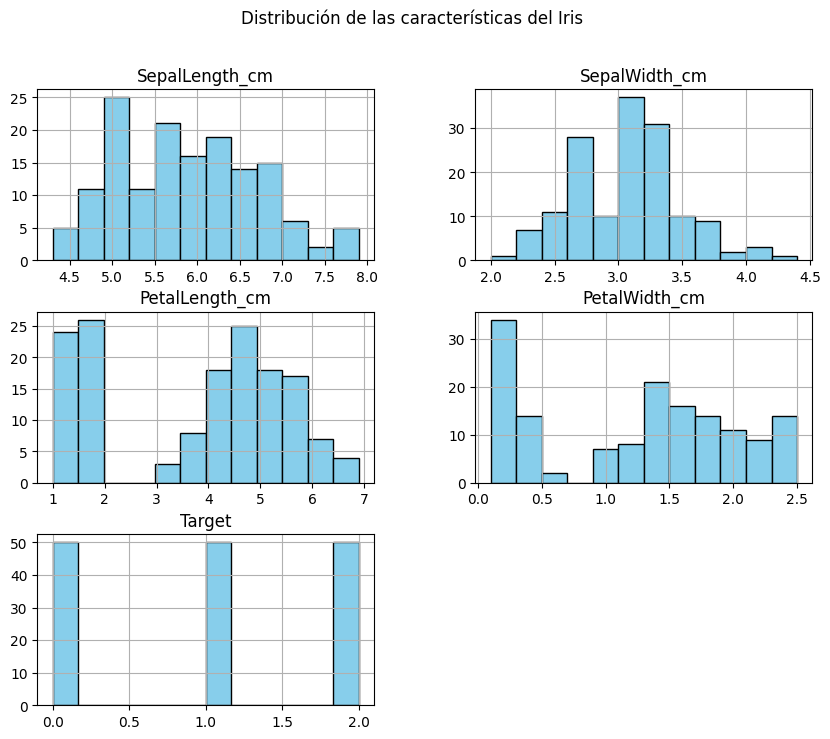

In [ ]:
df.hist(figsize=(10, 8), bins=12, color="skyblue", edgecolor="black")
plt.suptitle("Distribución de las características del Iris")
plt.show()

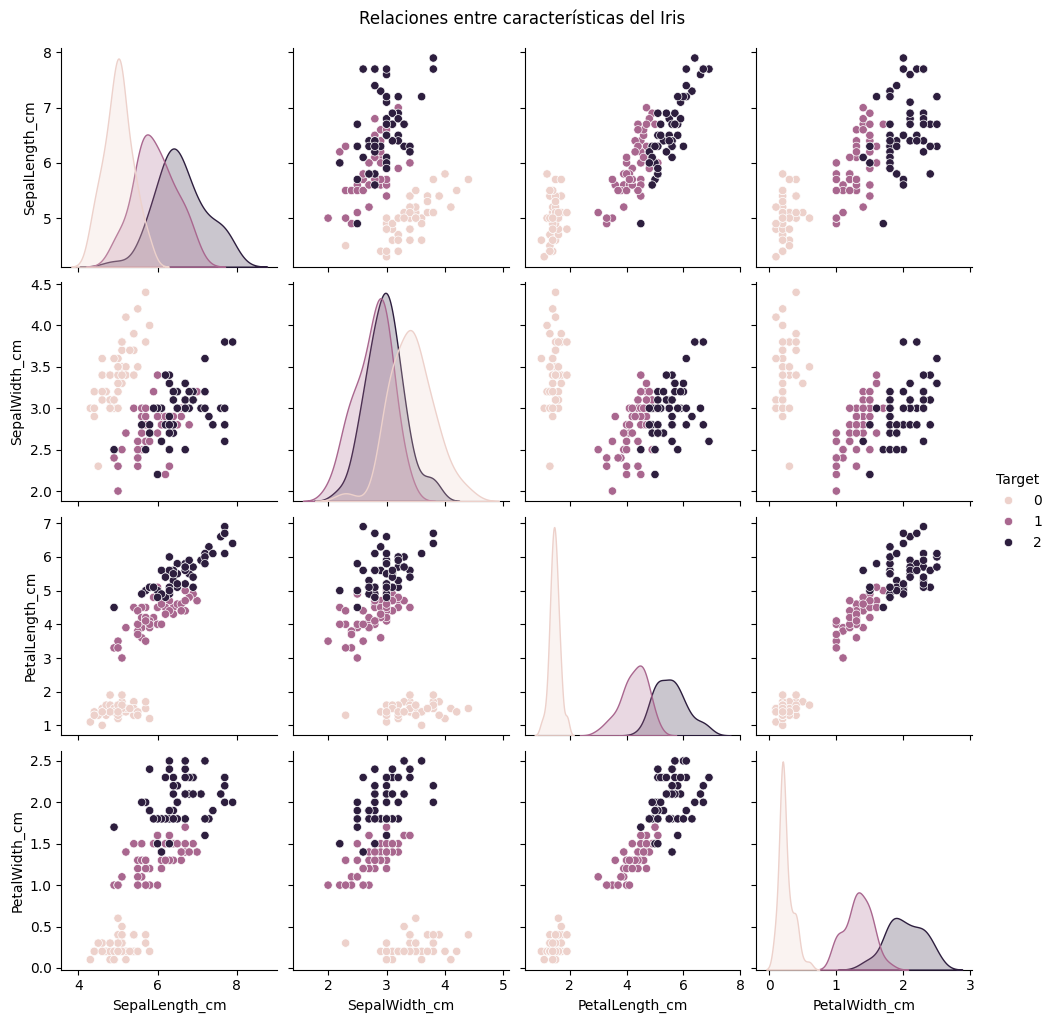

In [ ]:
sns.pairplot(df, hue="Target", diag_kind="kde")
plt.suptitle("Relaciones entre características del Iris", y=1.02)
plt.show()

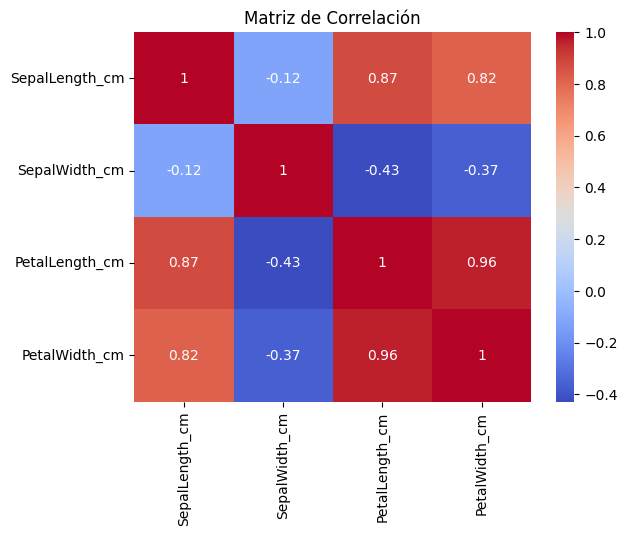

In [ ]:
numeric = df[numeric_cols]
corr_matrix = numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# 7)

Usamos StratifiedShuffleSplit para separar los datos en entrenamiento y test

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Target"]):
    strat_train_set = df.loc[train_index].reset_index(drop=True)
    strat_test_set = df.loc[test_index].reset_index(drop=True)

print("\nSizes: train=", strat_train_set.shape, " test=", strat_test_set.shape)
print("\nClass proportions in full dataset:\n", df["Target"].value_counts(normalize=True).sort_index())
print("\nClass proportions in stratified train:\n", strat_train_set["Target"].value_counts(normalize=True).sort_index())
print("\nClass proportions in stratified test:\n", strat_test_set["Target"].value_counts(normalize=True).sort_index())


Sizes: train= (120, 6)  test= (30, 6)

Class proportions in full dataset:
 Target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Class proportions in stratified train:
 Target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Class proportions in stratified test:
 Target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


Los datos se están separando en entrenamiento $80\%$ y prueba $20\%$, asegurando que la proporción de cada clase del target se mantenga igual en ambos subconjuntos, mediante muestreo estratificado aleatorio controlado por una semilla

# 8)

Construimos un modelo de regresion logistica con ayuda de sklearn para clasificar las clases en setosa y no setosa

In [ ]:
X = df[numeric_cols].values
y = df["Target"].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train = strat_train_set[numeric_cols].values
X_test = strat_test_set[numeric_cols].values
y_train = (strat_train_set["Target"] == 0).astype(int).values  # 1 for setosa
y_test = (strat_test_set["Target"] == 0).astype(int).values

scaler_train = StandardScaler().fit(X_train)
X_train_s = scaler_train.transform(X_train)
X_test_s = scaler_train.transform(X_test)

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train_s, y_train)
y_pred = log_reg.predict(X_test_s)
print("\n(Setosa vs Not):\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Binary Logistic (Setosa vs Not) - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix:
 [[20  0]
 [ 0 10]]


# 9)

Definimos las fronteras de clasificación

In [ ]:
feature_name = "PetalLength_cm"
X_single = df[[feature_name]].values
scaler_one = StandardScaler().fit(X_single)
X_single_s = scaler_one.transform(X_single)

X_train_one = scaler_one.transform(strat_train_set[[feature_name]].values)
X_test_one = scaler_one.transform(strat_test_set[[feature_name]].values)
log_reg_one = LogisticRegression(solver='liblinear')
log_reg_one.fit(X_train_one, (strat_train_set["Target"] == 0).astype(int).values)

X_new = np.linspace(X_single_s.min()-0.5, X_single_s.max()+0.5, 500).reshape(-1,1)
prob = log_reg_one.predict_proba(X_new)
decision_boundary_scaled = X_new[prob[:, 1] >= 0.5][0,0]
decision_boundary_orig = scaler_one.inverse_transform([[decision_boundary_scaled]])[0,0]

print(f"\nDecision boundary (single-feature PetalLength) in scaled space: {decision_boundary_scaled:.3f}")
print(f"Decision boundary (original PetalLength_Cm): {decision_boundary_orig:.3f}")


Decision boundary (single-feature PetalLength) in scaled space: -2.068
Decision boundary (original PetalLength_Cm): 0.120


# 10)

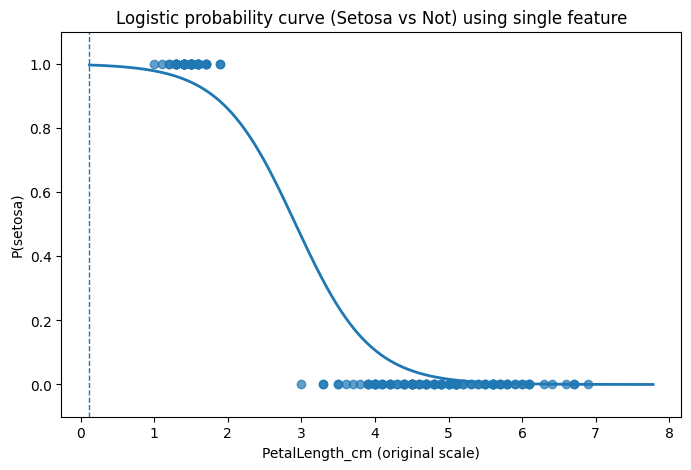

In [ ]:
plt.figure(figsize=(8,5))
y_binary = (df["Target"] == 0).astype(int)
plt.scatter(df[feature_name], y_binary, alpha=0.7)
X_new_orig = scaler_one.inverse_transform(X_new)
plt.plot(X_new_orig, prob[:, 1], linewidth=2)
plt.axvline(decision_boundary_orig, linestyle='--', linewidth=1)
plt.xlabel(feature_name + " (original scale)")
plt.ylabel("P(setosa)")
plt.title("Logistic probability curve (Setosa vs Not)")
plt.ylim(-0.1, 1.1)
plt.show()


# 11)

In [ ]:
ovr_clf = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
ovr_clf.fit(X_scaled, y)
y_pred_all = ovr_clf.predict(X_scaled)
print("\nMulticlass OvR:\n", classification_report(y, y_pred_all))


Multiclass OvR - classification report (on full data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.86      0.89        50
           2       0.87      0.92      0.89        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



# 12)

In [ ]:
sample = np.array([4.9, 5.0, 1.8, 0.3]).reshape(1,-1)
sample_scaled = scaler.transform(sample)
probs_sample = ovr_clf.predict_proba(sample_scaled)[0]
print("\nDados:", sample.flatten().tolist())
for cls_idx, prob_val in enumerate(probs_sample):
    print(f"P(class={cls_idx} ({iris['target_names'][cls_idx]})) = {prob_val:.4f}")


Given sample: [4.9, 5.0, 1.8, 0.3]
P(class=0 (setosa)) = 0.9983
P(class=1 (versicolor)) = 0.0015
P(class=2 (virginica)) = 0.0002


In [ ]:
print("\nOvR classifier coefficients (one row per class):")
for i, est in enumerate(ovr_clf.estimators_):
    print(f"Class {i} ({iris['target_names'][i]}): intercept={est.intercept_[0]:.3f}, coeffs={np.round(est.coef_[0],3)}")


OvR classifier coefficients (one row per class):
Class 0 (setosa): intercept=-1.614, coeffs=[-0.811  1.399 -1.686 -1.512]
Class 1 (versicolor): intercept=-0.898, coeffs=[ 0.137 -1.259  0.791 -0.915]
Class 2 (virginica): intercept=-2.707, coeffs=[ 0.012 -0.142  1.861  2.699]
